## Στοιχεία Ομάδας

Αριθμός Ομάδας: F05

    > Καρυπιάδης Ευστράτιος: 03114911
    > Σταματελόπουλος Νικόλαος: 03116138

## Reading, Resizing and Combining

In [0]:
import skimage
import numpy as np
from skimage import io
from skimage import img_as_float, img_as_ubyte
from skimage.transform import resize
from matplotlib import pyplot as plt

# Reading image files
face_image1 = img_as_float(io.imread('1.jpg'))

face_image2 = img_as_float(io.imread('2.jpg'))

# # Rescaling to desired dimensions
face_image1_resized = resize(face_image1, (512, 288), anti_aliasing=True)
face_image2_resized = resize(face_image2, (512, 288), anti_aliasing=True)

# Concatinating horizontally to one image
final_image = np.concatenate((face_image1_resized, face_image2_resized), axis=1)

In [0]:
from skimage import color

# Selecting HSV color space
final_image_hsv = color.rgb2hsv(final_image)

## Adding Noise

In [0]:
from skimage.util import random_noise

def snpAmount(digit):
  return 1/90*digit + 0.3 

# Adding noise
gaussian_image = random_noise(final_image_hsv, mode='gaussian', seed=8) # selecting 8 from 03116138
saltpepper_image = random_noise(final_image_hsv, mode='s&p', seed=42, amount=snpAmount(8)) # selecting 8 from 03116138

## Filtering

### Gaussian Noise Image

Text(0.5, 1.0, 'Median Filter')

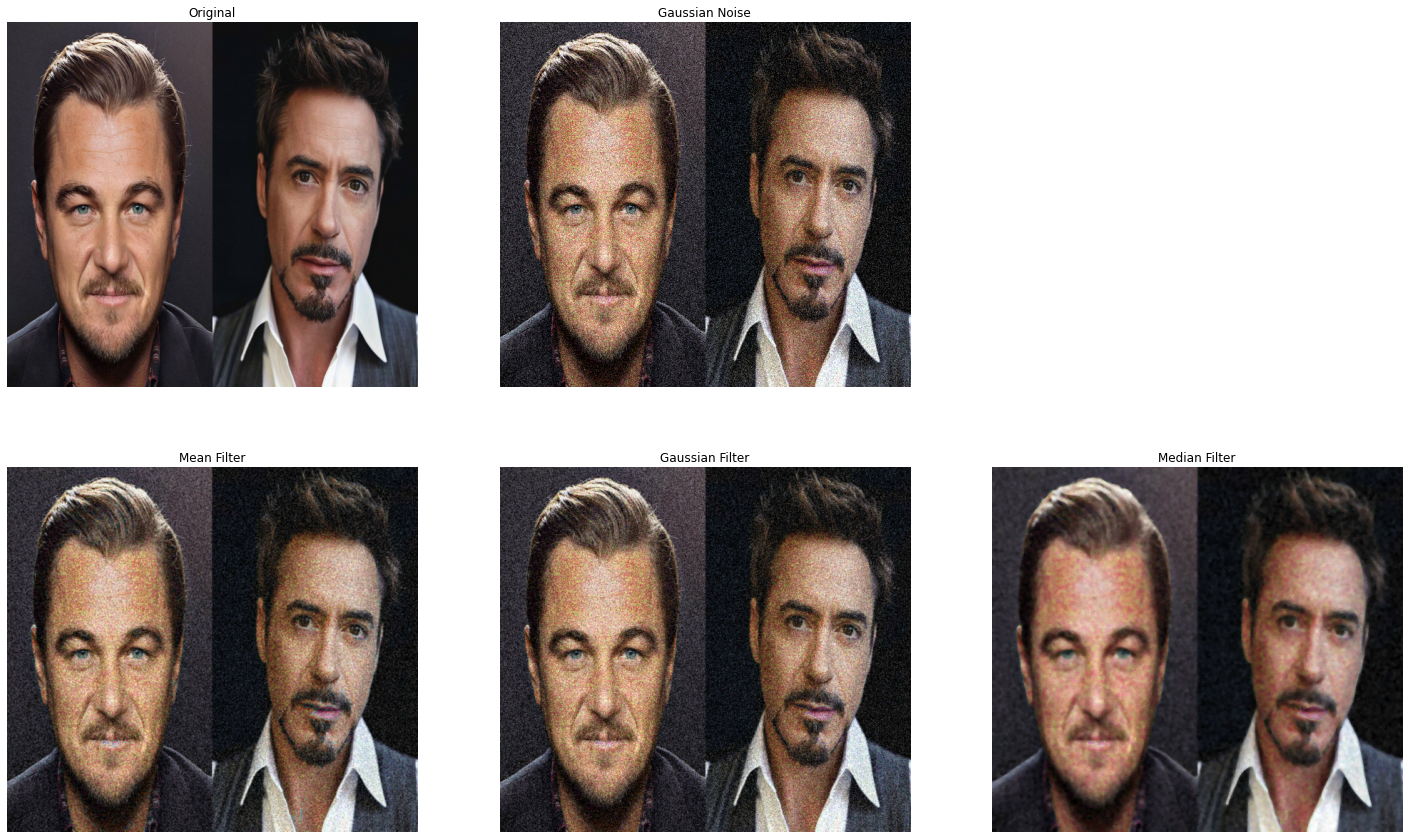

In [0]:
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk

# Mean filter
mean_kernel = np.full((2, 2), 1/4)
mean_filteredH = ndimage.convolve(gaussian_image[:, :, 0], mean_kernel)
mean_filteredS = ndimage.convolve(gaussian_image[:, :, 1], mean_kernel)
mean_filteredV = ndimage.convolve(gaussian_image[:, :, 2], mean_kernel)
mean_filtered_gaussian = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))

# Gaussian filter
sigma = 0.5
gaus_filteredH = filters.gaussian(gaussian_image[:, :, 0], sigma)
gaus_filteredS = filters.gaussian(gaussian_image[:, :, 1], sigma)
gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma)
gaus_filtered_gaussian = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))

# Median filter
neighborhood = disk(3)
median_filteredH = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 0]), neighborhood)
median_filteredS = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 1]), neighborhood)
median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood)
median_filtered_gaussian = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))

fig, axes = plt.subplots(2, 3, figsize=(25, 15))

for ax in axes:
  for subax in ax:
    subax.axis('off')

(ax_original, ax_gaussianNoise, _), (ax_meanFilter, ax_gaussianFilter, ax_medianFilter) = axes
    
ax_original.imshow(final_image)
ax_original.set_title('Original')

ax_gaussianNoise.imshow(color.hsv2rgb(gaussian_image))
ax_gaussianNoise.set_title('Gaussian Noise')

ax_meanFilter.imshow(color.hsv2rgb(mean_filtered_gaussian))
ax_meanFilter.set_title('Mean Filter')

ax_gaussianFilter.imshow(color.hsv2rgb(gaus_filtered_gaussian))
ax_gaussianFilter.set_title('Gaussian Filter')

ax_medianFilter.imshow(color.hsv2rgb(median_filtered_gaussian))
ax_medianFilter.set_title('Median Filter')

### Salt & Pepper Noise Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Median Filter')

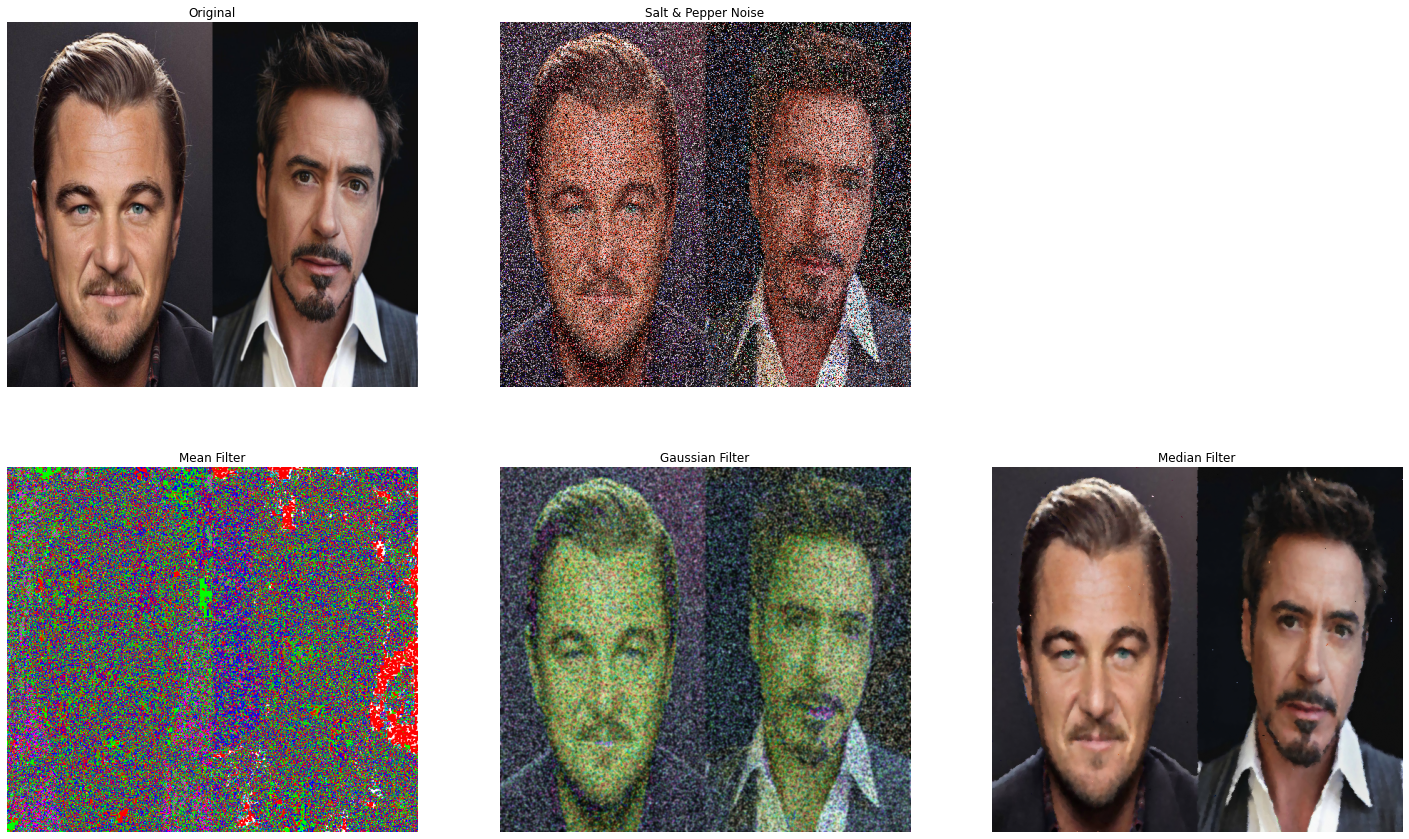

In [0]:
# Mean filter
mean_kernel = np.full((3, 3), 9)
mean_filteredH = ndimage.convolve(saltpepper_image[:, :, 0], mean_kernel)
mean_filteredS = ndimage.convolve(saltpepper_image[:, :, 1], mean_kernel)
mean_filteredV = ndimage.convolve(saltpepper_image[:, :, 2], mean_kernel)
mean_filtered_snp = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))

# Gaussian filter
sigma = 1
gaus_filteredH = filters.gaussian(saltpepper_image[:, :, 0], sigma)
gaus_filteredS = filters.gaussian(saltpepper_image[:, :, 1], sigma)
gaus_filteredV = filters.gaussian(saltpepper_image[:, :, 2], sigma)
gaus_filtered_snp = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))

# Median filter
neighborhood = disk(3)
median_filteredH = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 0]), neighborhood)
median_filteredS = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 1]), neighborhood)
median_filteredV = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 2]), neighborhood)
median_filtered_snp = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))

fig, axes = plt.subplots(2, 3, figsize=(25, 15))

for ax in axes:
  for subax in ax:
    subax.axis('off')

(ax_original, ax_snpNoise, _), (ax_meanFilter, ax_gaussianFilter, ax_medianFilter) = axes
    
ax_original.imshow(final_image)
ax_original.set_title('Original')

ax_snpNoise.imshow(color.hsv2rgb(saltpepper_image))
ax_snpNoise.set_title('Salt & Pepper Noise')

ax_meanFilter.imshow(color.hsv2rgb(mean_filtered_snp))
ax_meanFilter.set_title('Mean Filter')

ax_gaussianFilter.imshow(color.hsv2rgb(gaus_filtered_snp))
ax_gaussianFilter.set_title('Gaussian Filter')

ax_medianFilter.imshow(color.hsv2rgb(median_filtered_snp))
ax_medianFilter.set_title('Median Filter')

In [0]:
gaussian_final = median_filtered_gaussian
saltpepper_final = median_filtered_gaussian

## Edge Detection